In [10]:
#!pip install yahoofinance

In [74]:
import yahoofinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Exporting a CSV with Apple's Historical data

In [11]:
historical = yf.HistoricalPrices('AAPL', '2010-01-01', '2019-9-18')
hist_dfs = historical.to_dfs()
hist_df = dfs['Historical Prices']
hist_df.to_csv('AAP.csv')
hist_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,26.681330,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,26.727465,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,26.302330,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.253704,119282800
2010-01-08,30.042856,30.285715,29.865715,30.282858,26.428249,111902700


## Pre-Processing

In [60]:
test_size = 90

samples = len(hist_df)-training_size

idx = np.arange(samples).astype(np.int)[:,None]+np.arange(test_size+1).astype(np.int)

In [21]:
np.arange(test_size+1).astype(np.int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90])

In [52]:
new_df=hist_df[['Adj Close']]
new_df['MA 9'] = hist_df['Adj Close'].rolling(9).mean().shift()
new_df['MA 21'] = hist_df['Adj Close'].rolling(21).mean().shift()
new_df['Change'] = np.log( hist_df['Adj Close'] / hist_df['Adj Close'].shift() )
new_df['Volatility'] = new_df.Change.rolling(21).std().shift()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [53]:
# backfill missing values from moving averages
new_df.reset_index(inplace=True)
new_df.dropna(axis = 0, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
new_df.head(20)

,Date,Adj Close,MA 9,MA 21,Change,Volatility
22,2010-02-04,23.943514,24.876622,25.661332,-0.036704,0.022852
23,2010-02-05,24.368649,24.797662,25.528762,0.017600,0.023934
24,2010-02-08,24.201584,24.692244,25.436682,-0.006879,0.024298
25,2010-02-09,24.459652,24.528507,25.338962,0.010607,0.024304
26,2010-02-10,24.326265,24.366569,25.245220,-0.005468,0.024405
27,2010-02-11,24.768839,24.308805,25.156227,0.018030,0.024380
28,2010-02-12,24.982042,24.400368,25.102498,0.008571,0.024747
29,2010-02-16,25.358553,24.478636,25.041527,0.014959,0.024598
30,2010-02-17,25.252583,24.583085,25.005728,-0.004188,0.024869
31,2010-02-18,25.299952,24.629076,24.985661,0.001874,0.024628


### Importing Data

In [61]:
df_full = pd.read_csv('AAP.csv', parse_dates=['Date'])

In [64]:
import datetime as dt

df_full['Date'] = df_full['Date'].apply(lambda x: x.toordinal())

In [67]:
X = df_full.drop('Adj Close', axis = 1)
y = df_full['Adj Close']

In [69]:
train_ratio = 0.90
train_size = int(len(X) * train_ratio)

In [70]:
X_train, X_test = X.loc[:train_size-1], X.loc[train_size:]
y_train, y_test = y.loc[:train_size-1], y.loc[train_size:]

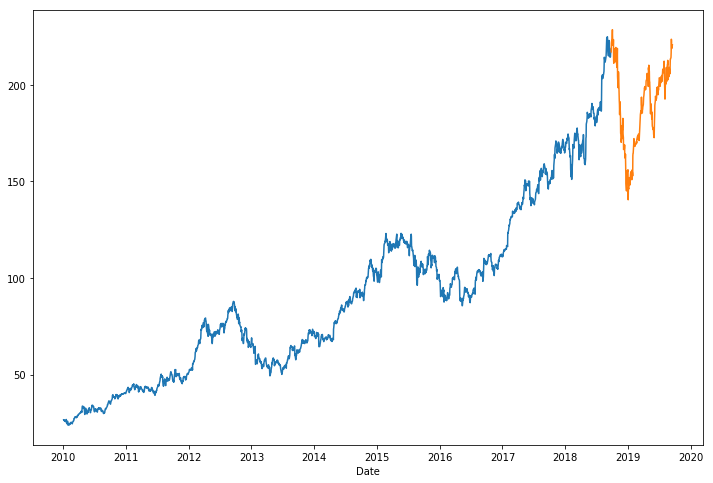

In [80]:
f, ax = plt.subplots(figsize=(12,8))

# plot the dataframe, Date as x axis, Adj Close as y axis
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train.values)
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test.values)
plt.show()

## 1. Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression


# LinearRegression constructor
lr = LinearRegression()

# fit the training data and training labels
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
# view 5 instances of the training data and labels
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

# print the results
print('Predictions: ', lr.predict(some_data))
print('Labels: ', list(some_labels))

Predictions:  [22.67659948 22.85147833 22.23342529 22.13277431 22.31370296]
Labels:  [26.68133, 26.727465, 26.30233, 26.253704, 26.428249]


Lets understand using the RMSE method

In [114]:
from sklearn.metrics import mean_squared_error

# predict the value of the stock using the prepared features
y_preds = lr.predict(X_train)

# calculate error from training labels and predictions
lin_mse = mean_squared_error(y_train, y_preds)

# take the square root
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.9132367934991974

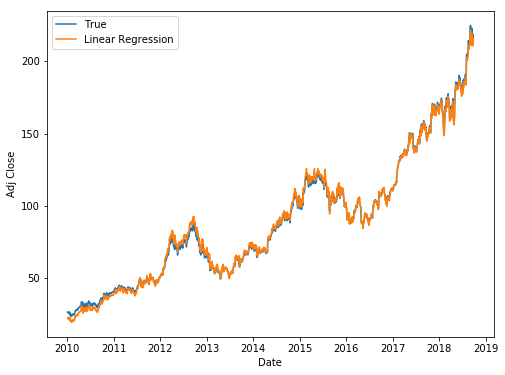

In [85]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train, label = 'True')
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_preds, label = 'Linear Regression')
plt.show()

## 2 Ridge Regression

In [89]:
from sklearn.linear_model import Ridge

In [90]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.43044e-17): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
# view 5 instances of the training data and labels
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

# print the results
print('Predictions: ', ridge_model.predict(some_data))
print('Labels: ', list(some_labels))

Predictions:  [22.67650997 22.85139404 22.23372358 22.13273453 22.31355813]
Labels:  [26.68133, 26.727465, 26.30233, 26.253704, 26.428249]


In [109]:
y_ridge_preds = ridge_model.predict(X_train)

# calculate error from training labels and predictions
ridge_mse = mean_squared_error(y_train, y_ridge_preds)

# take the square root
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

1.9132369147289745

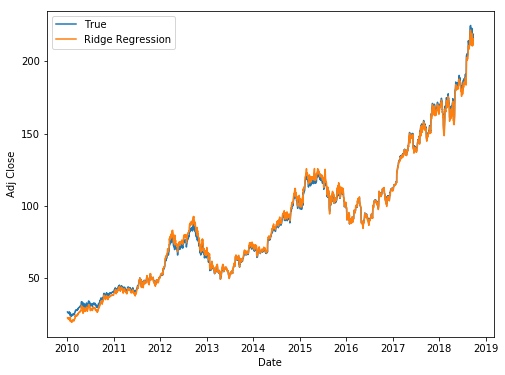

In [95]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_train, label = 'True')
ax = sns.lineplot(x = X_train['Date'].apply(dt.datetime.fromordinal), y = y_ridge_preds, label = 'Ridge Regression')
plt.show()

## 3 Lasso Regression

In [96]:
from sklearn.linear_model import Lasso

In [98]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
# print the results
print('Predictions: ', lasso_reg.predict(some_data))
print('Labels: ', list(some_labels))

Predictions:  [22.56737497 22.70285516 22.51599894 22.21709296 22.19176847]
Labels:  [26.68133, 26.727465, 26.30233, 26.253704, 26.428249]


In [108]:
y_lasso_preds = lasso_reg.predict(X_train)

# calculate error from training labels and predictions
lasso_mse = mean_squared_error(y_train, y_lasso_preds)

# take the square root
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

2.068382077859886

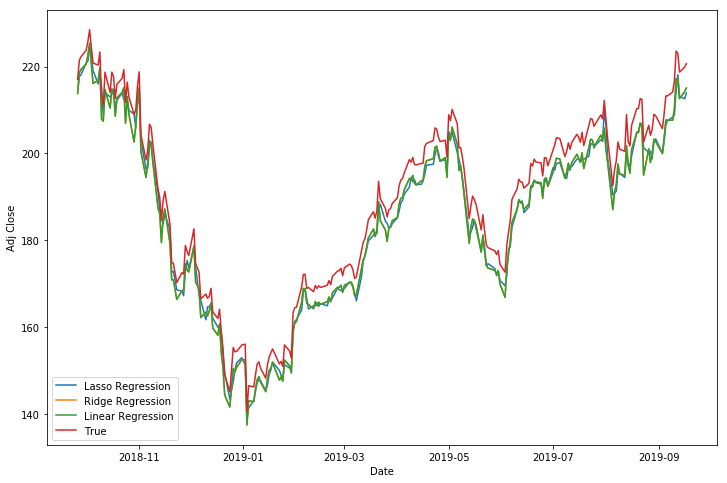

In [102]:
f, ax = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = lasso_reg.predict(X_test), label = 'Lasso Regression')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = ridge_model.predict(X_test), label = 'Ridge Regression')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = lr.predict(X_test), label = 'Linear Regression')
ax = sns.lineplot(x = X_test['Date'].apply(dt.datetime.fromordinal), y = y_test, label = 'True')

In [115]:
lin_rmse,ridge_rmse,lasso_rmse

(1.9132367934991974, 1.9132369147289745, 2.068382077859886)

### Linear Regression and Ridge regression perform better than Lasso regression in the case of Prediction